<a href="https://colab.research.google.com/github/1sik/2022-CodingTest/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns

#데이터 불러오기
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


**Pandas를 이용한 탐색**

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#범주형 데이터의 경우
df.describe(include='O')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


**범주형 데이터의 분포**

In [11]:
for col in df.columns:
    if df[col].dtype == 'object':
        categories = df[col].unique()
        print(f'[{col}] ({len(categories)})')

[sex] (2)
[embarked] (4)
[who] (3)
[embark_town] (4)
[alive] (2)


In [13]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [5]:
df.fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

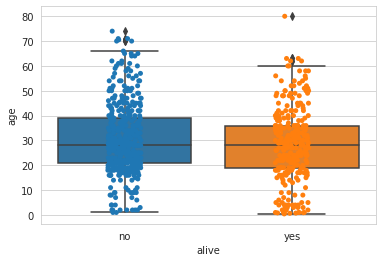

In [12]:
#이상치 확인
import seaborn as sns
sns.set_style('whitegrid')
ax = sns.boxplot(x='alive',y='age',data=df)
ax = sns.stripplot(x='alive',y='age',data=df)

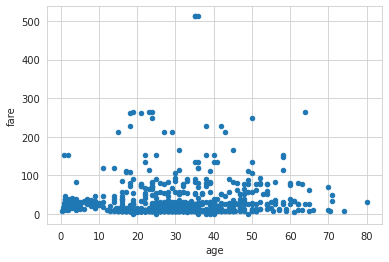

In [13]:
ageAndfare = df[['age','fare']]
ageAndfare.plot.scatter(x = 'age', y = 'fare')

**데이터 시각화**

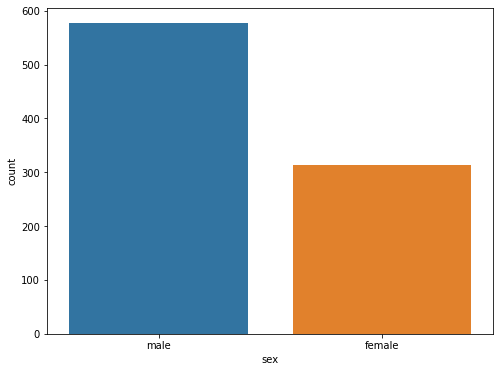

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='sex', data=df)
plt.show()

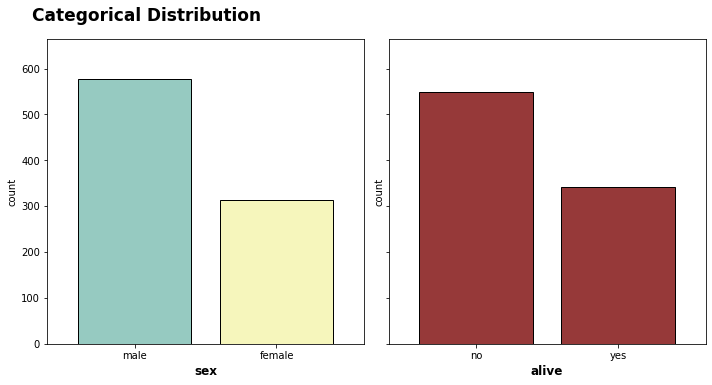

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.countplot(x='sex', data=df, ax=axes[0], palette="Set3", edgecolor='black') 
sns.countplot(x='alive', data=df, ax=axes[1], color='brown', edgecolor='black') 


for ax in axes : 
    ax.margins(0.12, 0.15)
    ax.xaxis.label.set_size(12)
    ax.xaxis.label.set_weight('bold')

       
plt.suptitle('Categorical Distribution', 
             fontsize=17, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left' 
            ) 

plt.tight_layout()
plt.show()

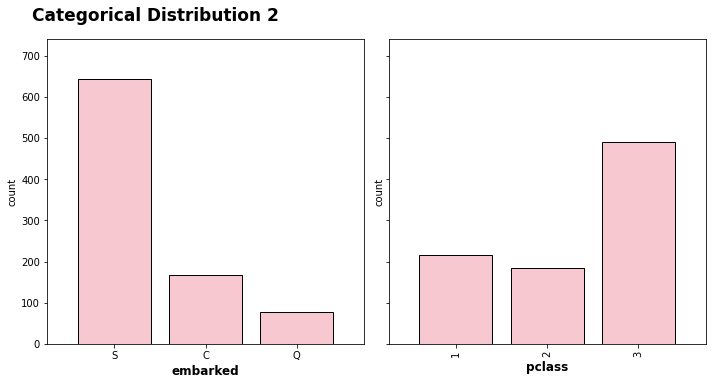

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.countplot(x='embarked', data=df, ax=axes[0], color="pink", edgecolor='black') 
sns.countplot(x='pclass', data=df, ax=axes[1], color='pink', edgecolor='black') 

for ax in axes : 
    ax.margins(0.12, 0.15)
    ax.xaxis.label.set_size(12)
    ax.xaxis.label.set_weight('bold')

plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=90 )    
  
plt.suptitle('Categorical Distribution 2', 
             fontsize=17, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left'
            ) 

plt.tight_layout()
plt.show()

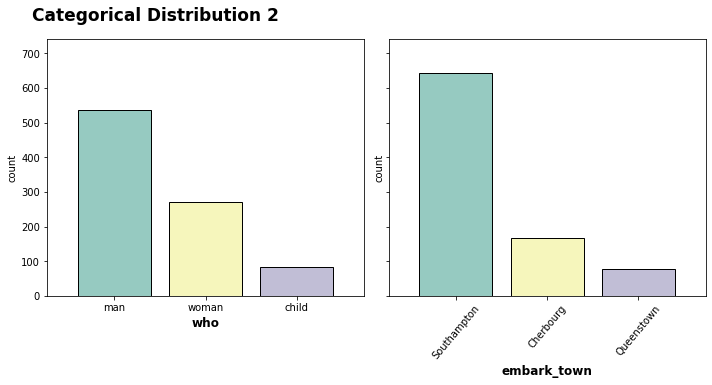

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.countplot(x='who', data=df, ax=axes[0], palette="Set3", edgecolor='black') 
sns.countplot(x='embark_town', data=df, ax=axes[1], palette='Set3', edgecolor='black') 

for ax in axes : 
    ax.margins(0.12, 0.15)
    ax.xaxis.label.set_size(12)
    ax.xaxis.label.set_weight('bold')

plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=50 )    
       
plt.suptitle('Categorical Distribution 2', 
             fontsize=17, 
             fontweight='bold',
             x=0.05, y=1.06,
             ha='left'
            ) 

plt.tight_layout()
plt.show()

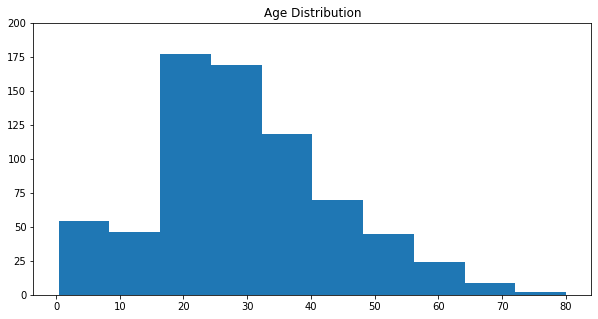

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(df['age'], bins=10)
ax.set_ylim(0, 200)
ax.set_title('Age Distribution')
plt.show()